# World Happiness Report Project

# Project Description

*The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.*

# What is Dystopia?

*Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.*

# What are the residuals?

*The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries.*

# What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

*The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.*

*The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.*

*The Dystopia Residual is already provided in the dataset.* 

*If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.*

**You need to predict the happiness score considering all the other factors mentioned in the dataset.**

***Dataset Link-****

https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv

# Answer:-

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [148]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Exploratory Data Analysis(E.D.A)

In [149]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [150]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [151]:
#Checking null value
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [152]:
#Checking for duplicated rows
df.duplicated().sum()

0

<Axes: >

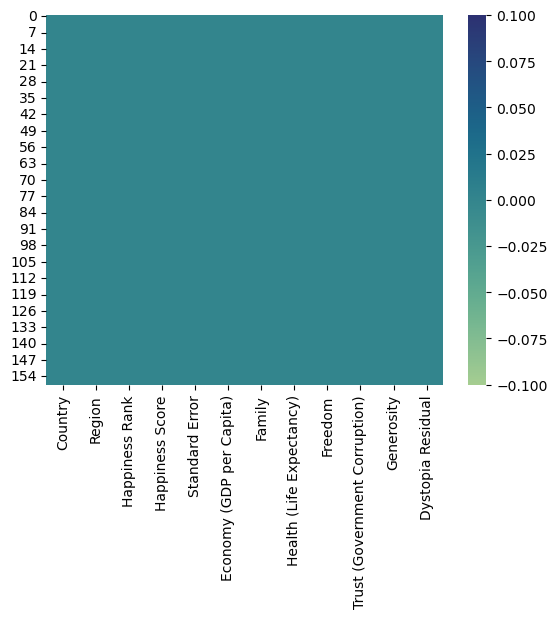

In [153]:
#Visualizing null values with heatmap
sns.heatmap(df.isnull(),cmap="crest")

In [154]:
#Checking unique values for all columns
df.nunique().to_frame("Unique value counts")

,Unique value counts
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


In [155]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0

In [156]:
df.set_index("Happiness Rank",inplace=True)

In [157]:
df

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,,
1,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
154,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
155,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
156,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


**Ovservation till now:-**
    
*1) For Country column there are 158 unique names and I dont need those names while predicting "Happiness Score" So I will drop Country column.*

*2) For "Region" column there is 10 unique values and first I had  thought of dropping this columns but it can play a vital role like basis of Region,Health (Life Expectancy), Economy (GDP per Capita) these kind of datas can be affected.*

*3) Here our Target column is "Happiness Score" and difference between it's total data count with it's unique value count is so less(1-means almost all values in this column are unique) so it's clear that it's a Regression problem*

In [158]:
#Dropping Country column
df.drop("Country",axis=1,inplace=True)
df.head(2)

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,
1,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


Country column is deleted.

In [159]:
df.shape

(158, 10)

# Description of Dataset

In [160]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


**Ovservation:-**


*1) Here no null value is present.*

*2) For Standard Error,Economy (GDP per Capita),Trust (Government Corruption),Generosity there are a huge difference between 75 percentile and max value,that means outliers must be present.*

*3)For Standard Error,Trust (Government Corruption),Generosity,Dystopia Residual columns mean value is greater than median(50%) thats mean these columns have right skewed data and rest of the column has left skewed data.*


# Data Visualization:-

**Bivariate analysis**

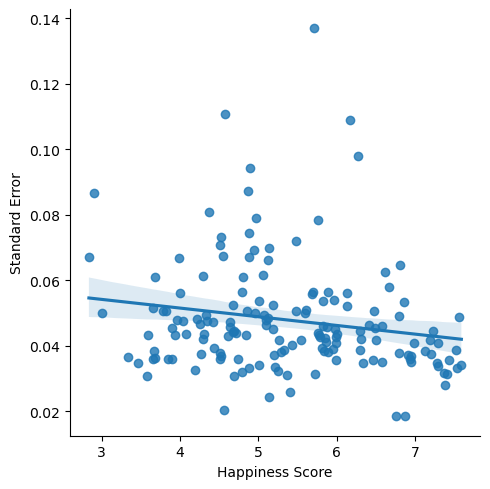

In [161]:
sns.lmplot(x="Happiness Score",y="Standard Error",data=df)

Here you can see our Target column "Happiness Score" has slightly Negative correlation with "Standard Error".

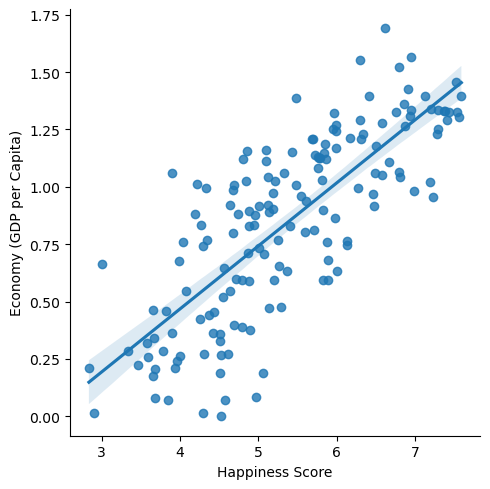

In [162]:
sns.lmplot(x="Happiness Score",y="Economy (GDP per Capita)",data=df)

Here you can see "Economy (GDP per Capita)" column  has a positive correlation with our Target column "Happiness Score".When GDP per Capita increases Happiness Score will also increases.

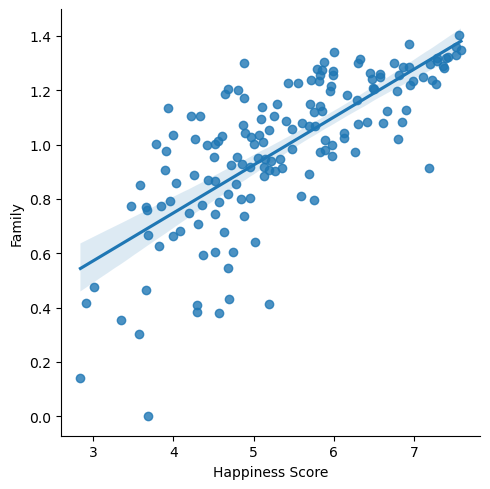

In [163]:
sns.lmplot(x="Happiness Score",y="Family",data=df)

"Family" Column also have the Positive correlation with our Target column "Happiness Score".

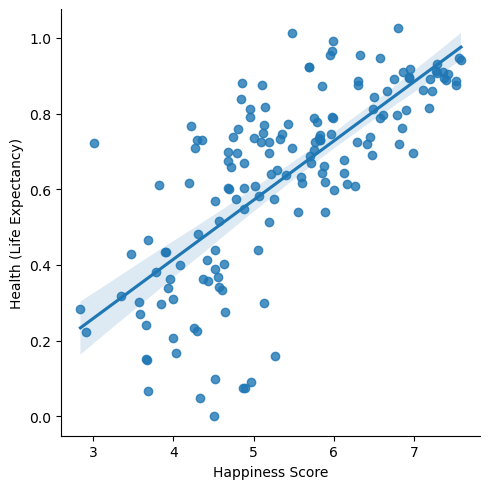

In [164]:
sns.lmplot(x="Happiness Score",y="Health (Life Expectancy)",data=df)

So "Health (Life Expectancy)" is also have Positive correlation with our Target Column.When Life Expectancy increases Happiness Score is also increased.

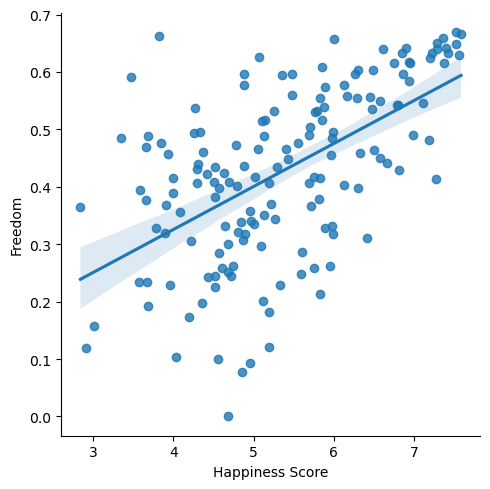

In [165]:
sns.lmplot(x="Happiness Score",y="Freedom",data=df)

"Freedom" is also positively correlated with our Target Column.

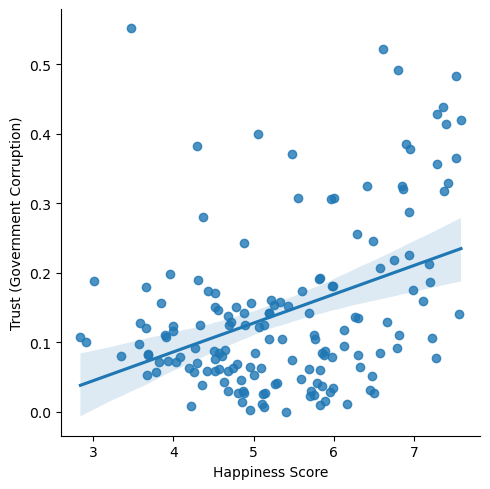

In [166]:
sns.lmplot(x="Happiness Score",y="Trust (Government Corruption)",data=df)

Trust (Government Corruption) column is slightly positive correlated with our Target column.

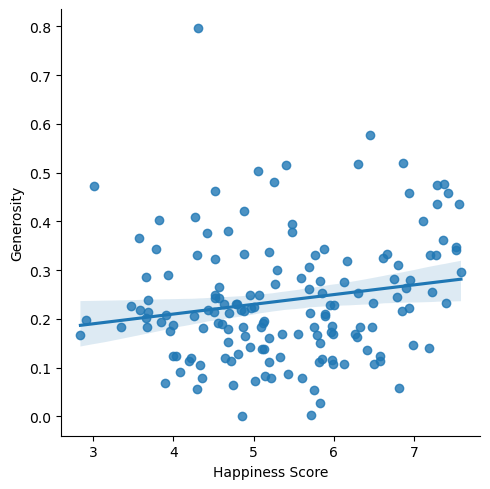

In [167]:
sns.lmplot(x="Happiness Score",y="Generosity",data=df)

Generosity column is minimally positive correlated with our Target column.

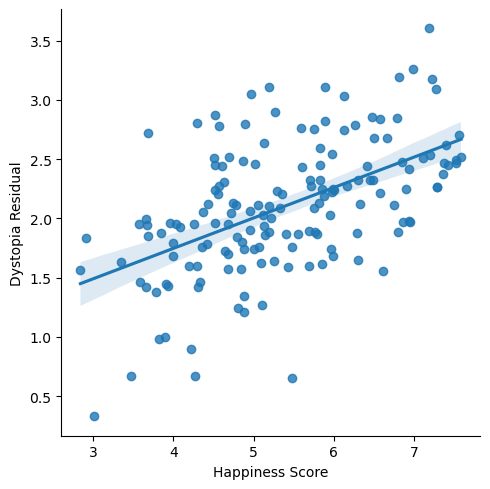

In [168]:
sns.lmplot(x="Happiness Score",y="Dystopia Residual",data=df)

Dystopia Residual column is positively correlated with our Target column.

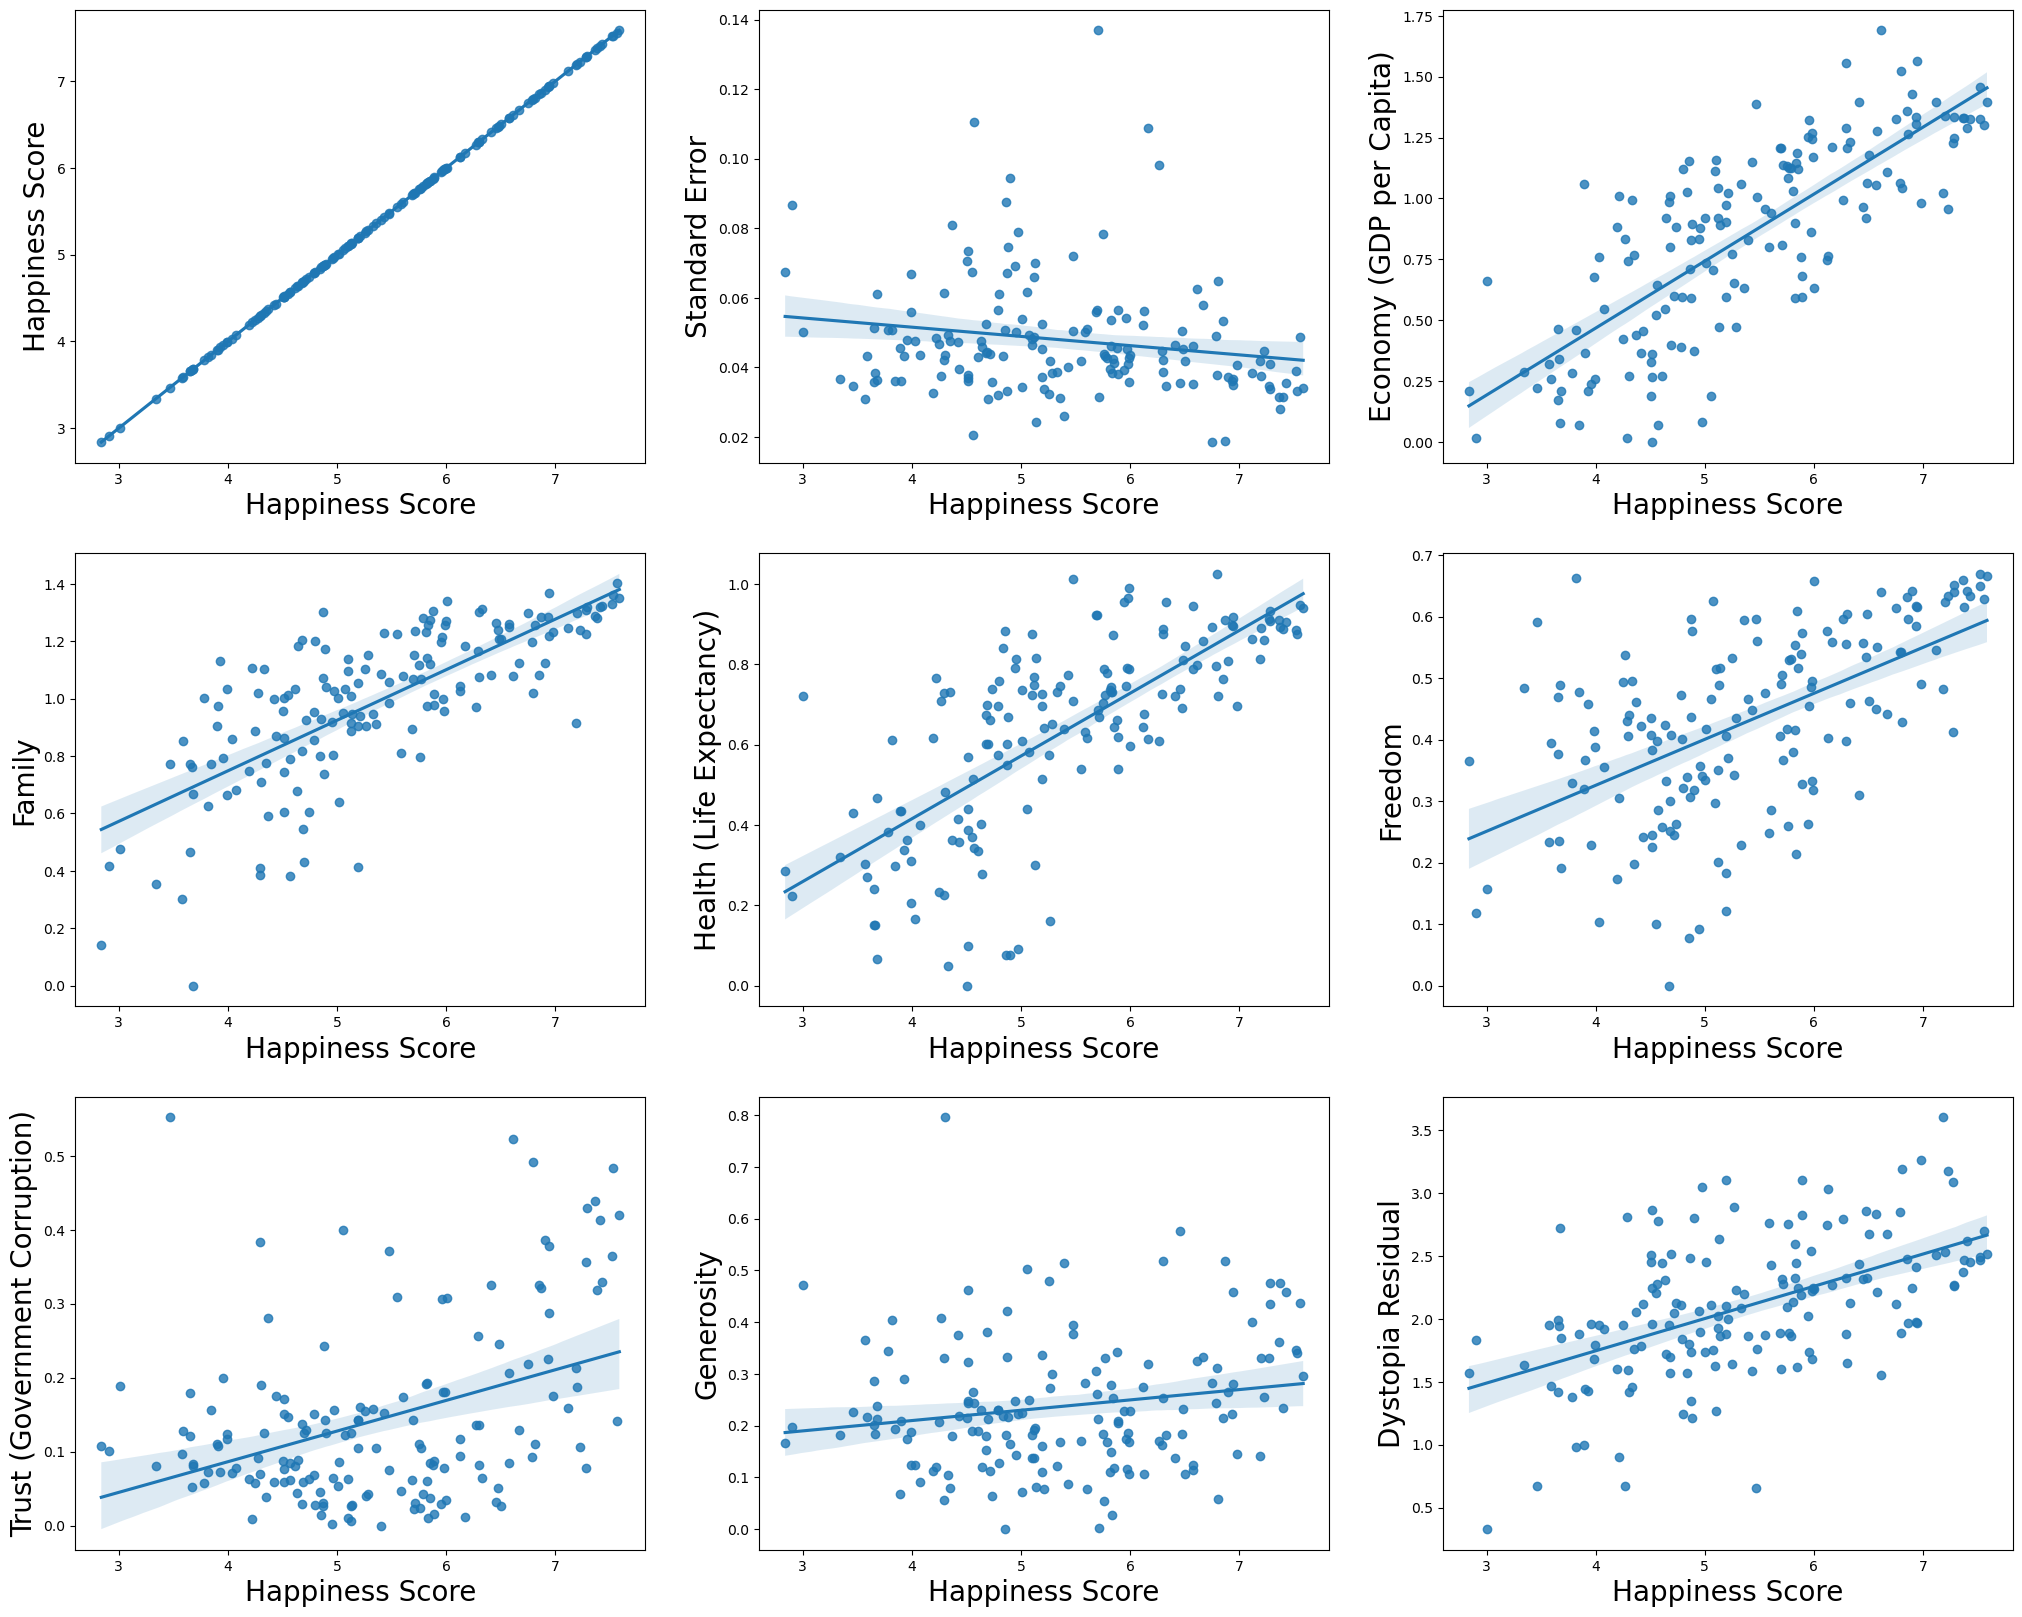

In [169]:
#Analysis of our Target column (Happiness Score) with all columns using regplot
plt.figure(figsize=(25,20))

plot=1

if plot<=14:
    for i in df.columns:
        if i=="Region":
            continue
        plt.subplot(3,3,plot)
        sns.regplot(x="Happiness Score",y=i,data=df)
        plt.xlabel("Happiness Score",fontsize=20)
        plt.ylabel(i,fontsize=20)
        
        plot+=1
    
plt.show()
    

**Multi variate analysis**

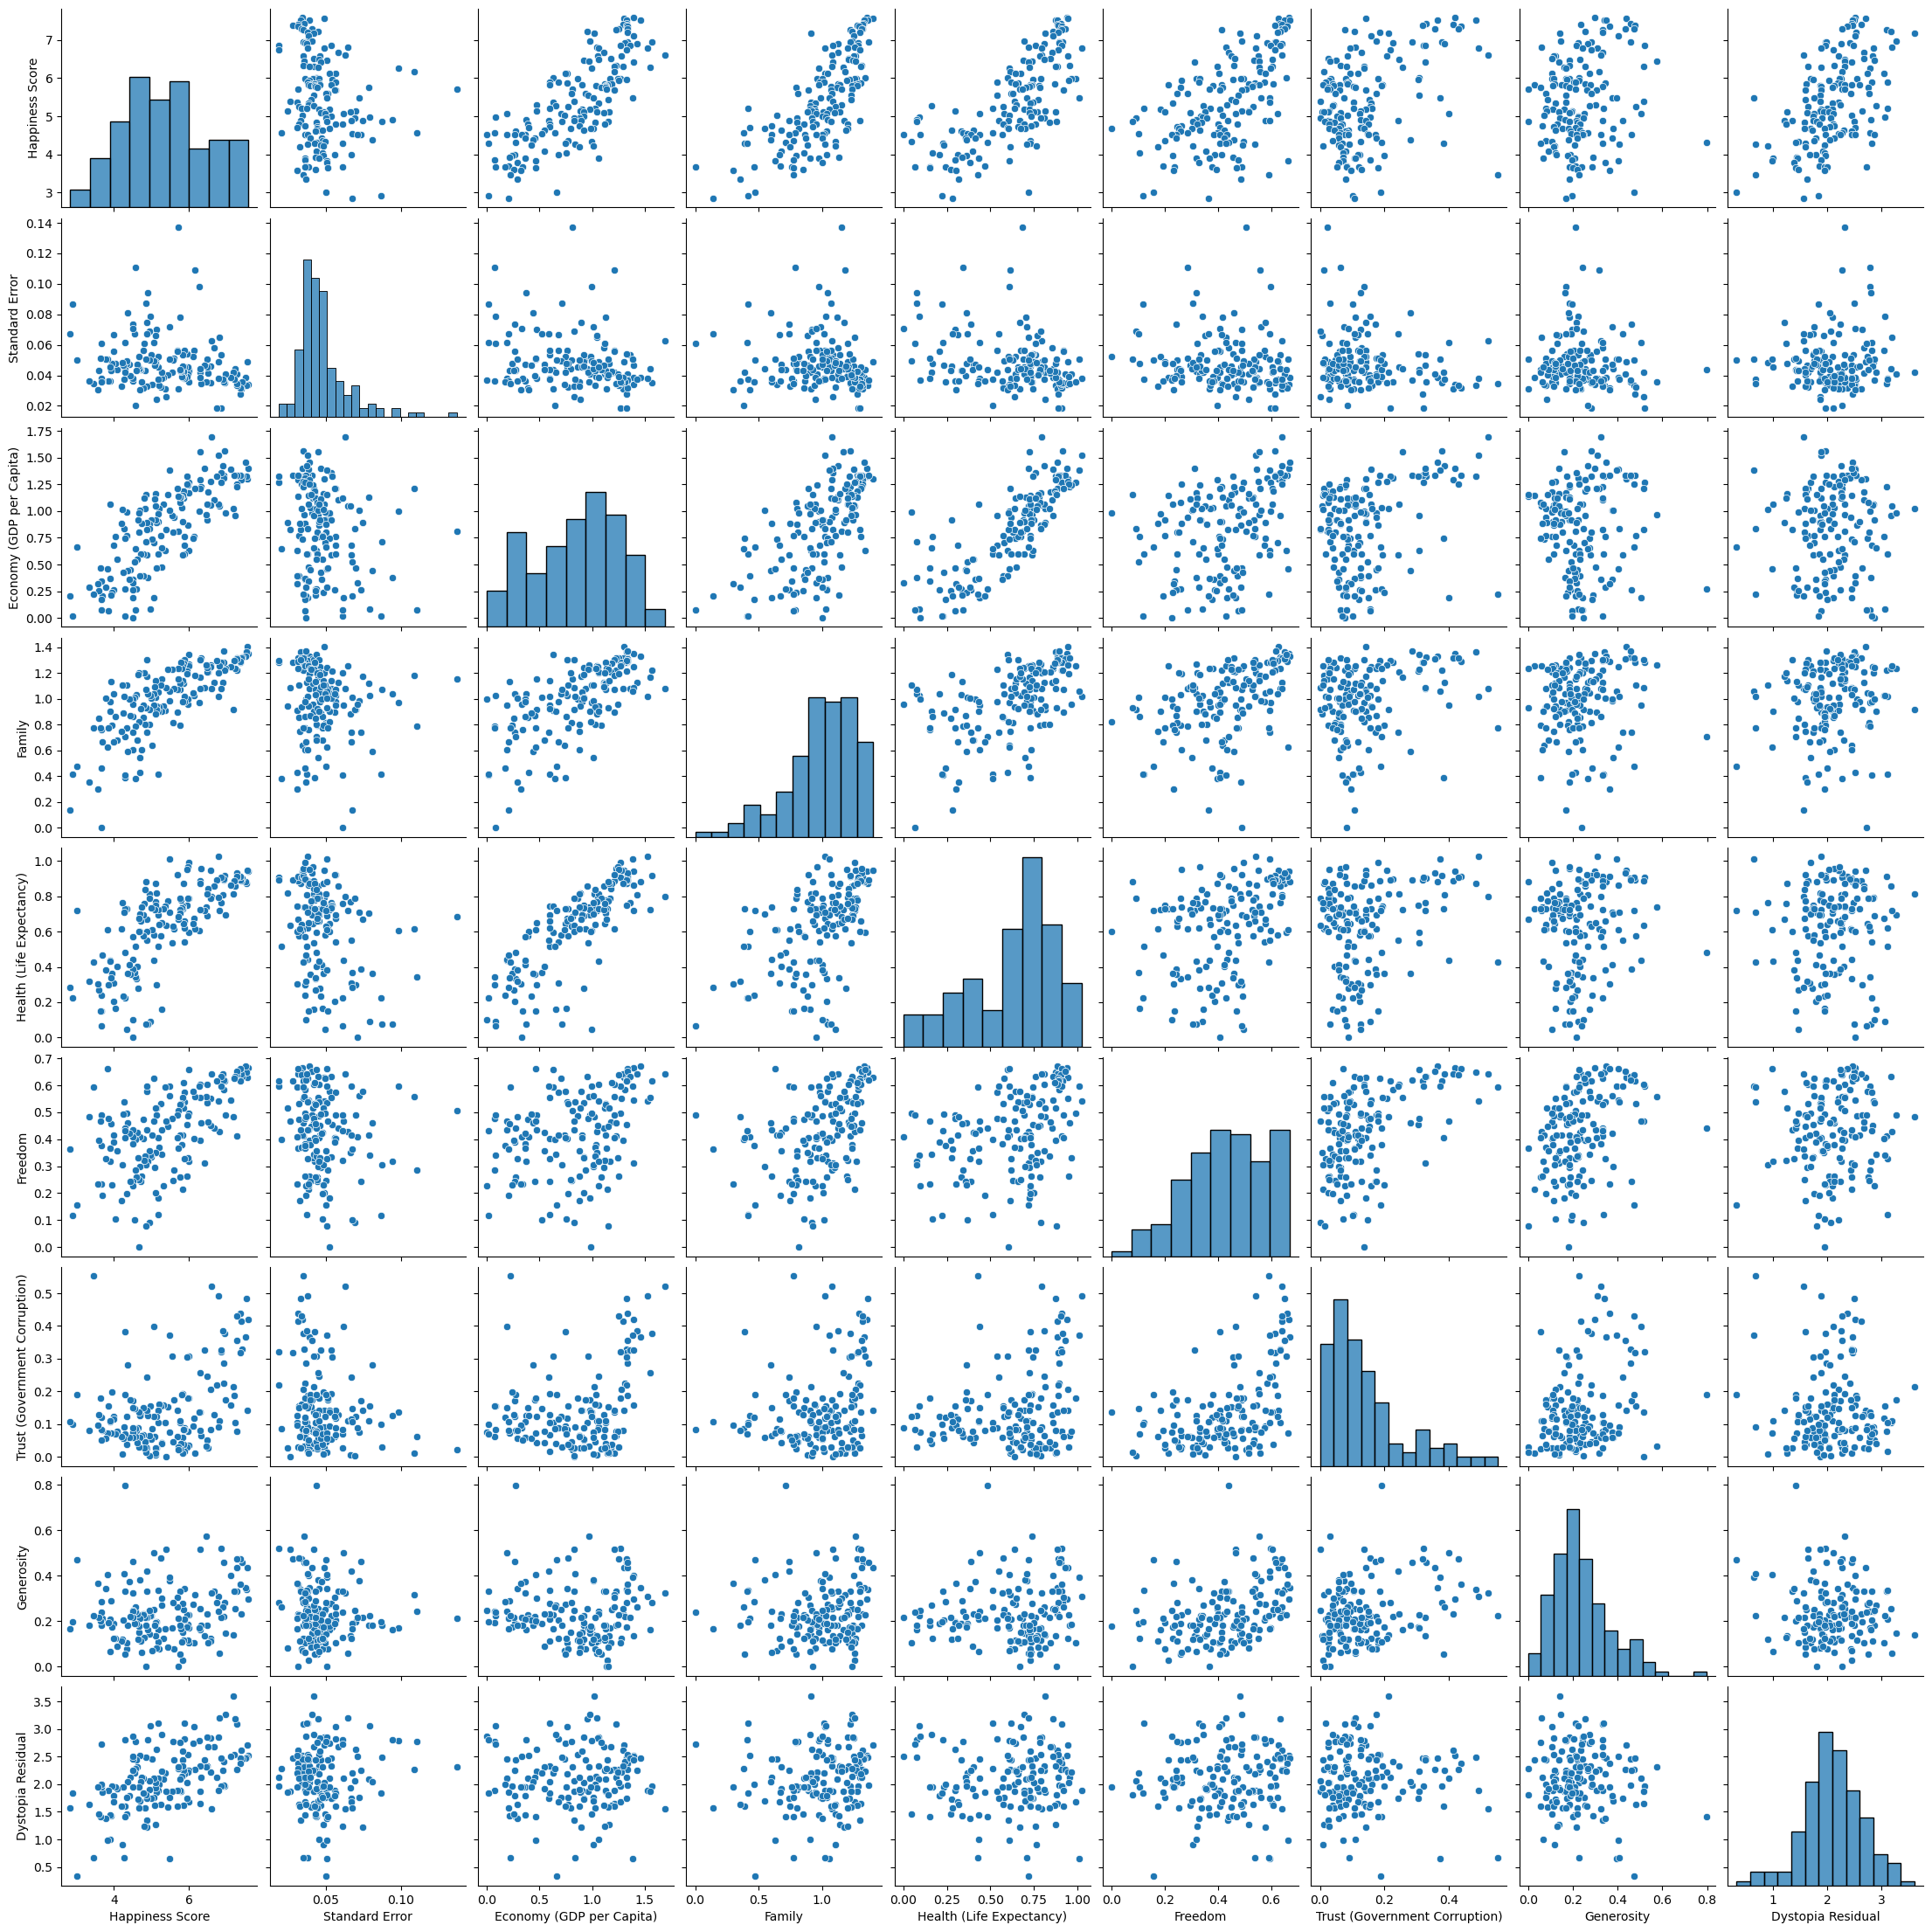

In [170]:
sns.pairplot(df,palette="Dark_2")

# Checking for Outliers

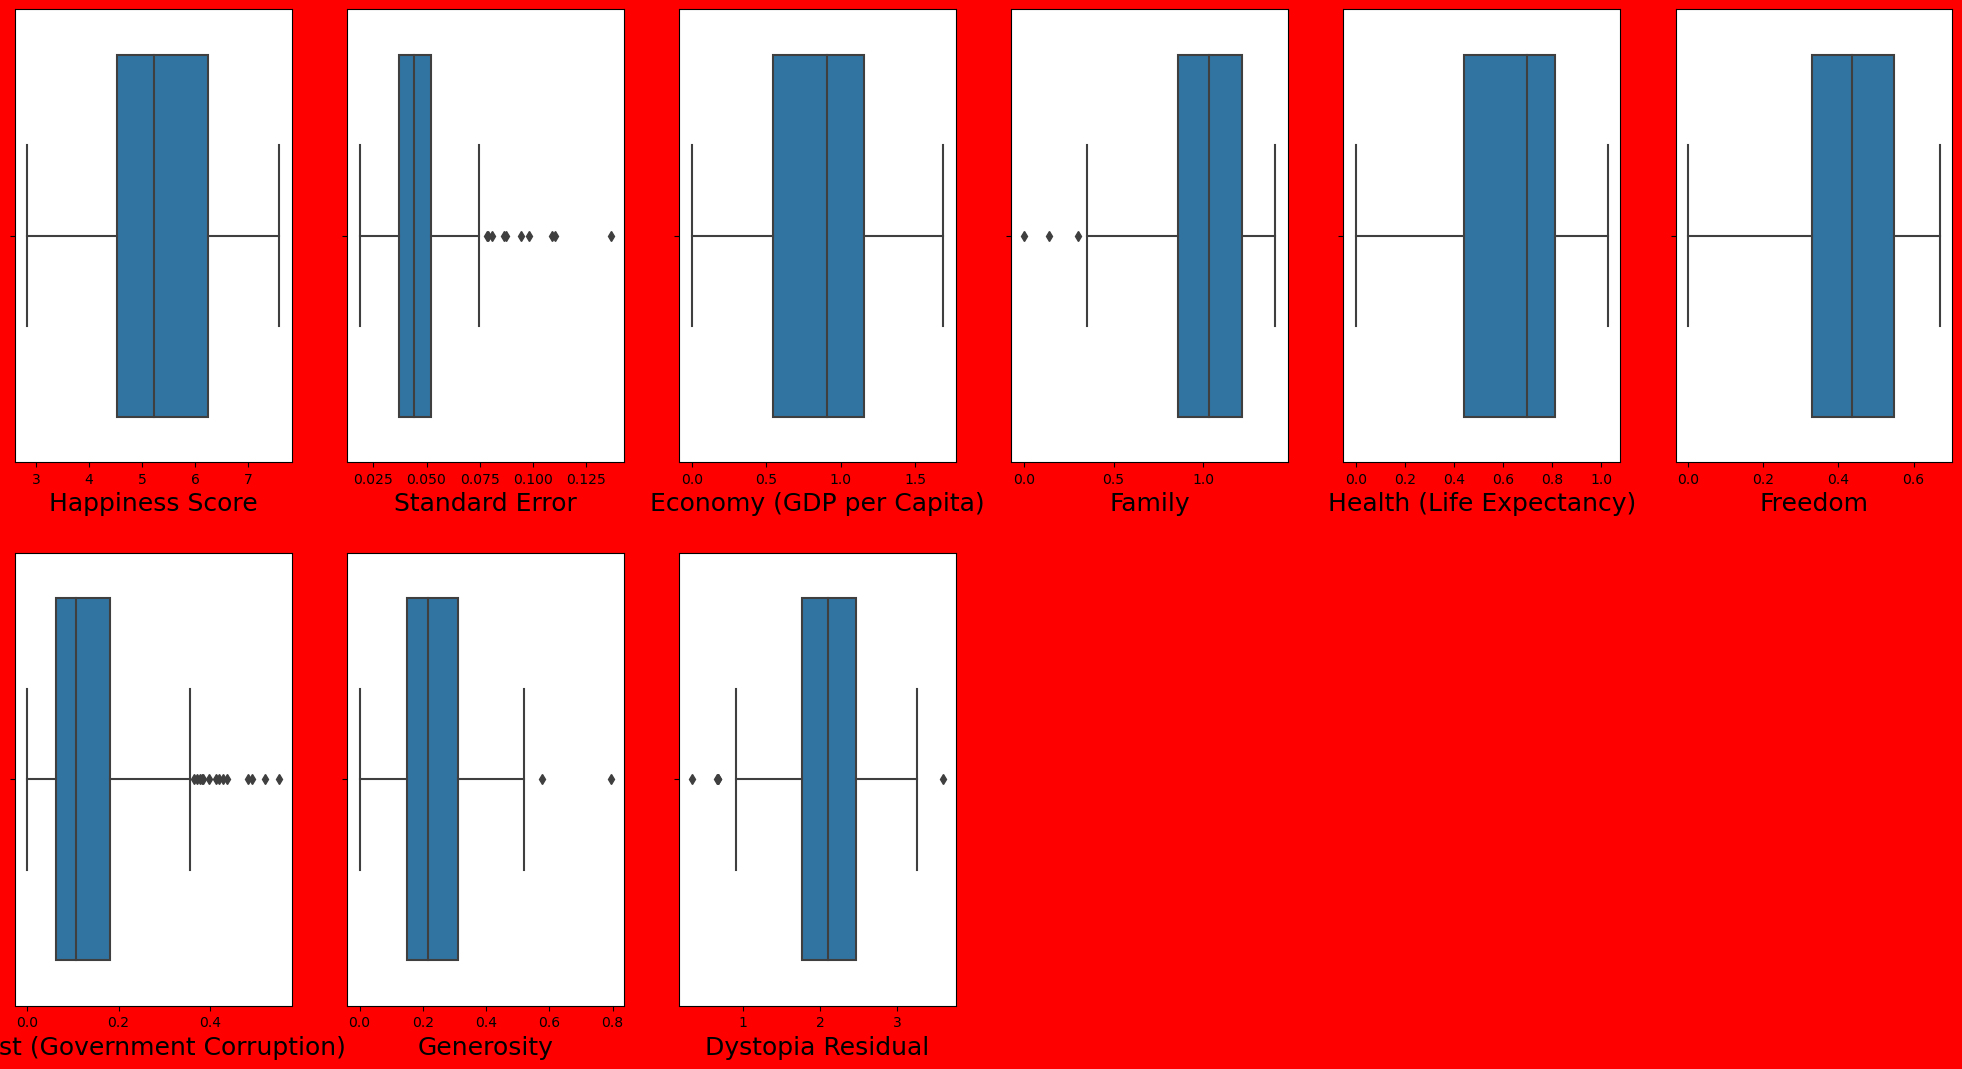

In [171]:
#Checking outliers using boxplot
plt.figure(figsize=(25,20),facecolor="r")
plot=1

for i in df.columns:
    if plot<=17:
        #I avoid Region column because it has string values and boxplot cant be use on string valiues containing columns
        if i=="Region":
            continue

        plt.subplot(3,6,plot)
        sns.boxplot(x=df[i])
        plt.xlabel(i,fontsize=18)
    plot+=1
    

plt.show()
        
    

**Observation:-**
    
Here you can see Standard Error,Family,st (Government Corruption),Generosity,Dystopia Residual has outliers,and we have to remove that.

# Removing outliers using zscore

In [172]:
from scipy.stats import zscore
wanted_features=df[["Standard Error","Economy (GDP per Capita)","Family","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity","Dystopia Residual"]]
#Here I avoid to include Happiness Score because it's our Target column and Region because it's a categorical column because it has only 10 unique values also we can't detect outliers on those column who has string values 
z=np.abs(zscore(wanted_features))
z

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,
1,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
2,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
3,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
4,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
5,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...
154,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
155,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
156,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430


In [173]:
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([5, 0, 0, 0, 6, 2, 5, 7, 2], dtype=int64))

In [174]:
#Finding outliers by giving their row and column location
z.iloc[27,5]

3.1646194851713774

**Creating outliers free dataset**

In [175]:
new_df=df[(z<3).all(axis=1)]
new_df.shape

(149, 10)

In [176]:
print("Old DataFrame",df.shape[0])
print("New DataFrame",new_df.shape[0])

Old DataFrame 158
New DataFrame 149


In [177]:
print("Data lost percentage is",((df.shape[0]-new_df.shape[0])/new_df.shape[0])*100)

Data lost percentage is 6.0402684563758395


**6% data lost is okey acceptable range is 10% but I will try IQR method to see how much data loss it gets if we use it to remove outliers.**

**Using IQR to remove outliers**

In [178]:
#3rd quantile
Q3=wanted_features.quantile(0.75)

In [179]:
#1st Quantile
Q1=wanted_features.quantile(0.25)

In [180]:
#IQR
IQR=Q3-Q1

In [181]:
new_df_2=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

In [182]:
new_df_2.shape

(126, 10)

In [183]:
print("Data lost percentage after use IQR method",(df.shape[0]-new_df_2.shape[0])/df.shape[0]*100)

Data lost percentage after use IQR method 20.253164556962027


**Here we can see 20% data lost we will get if we take IQR method to remove ouliers.So we are good with new_df that is outlier free dataset using zscore.** 

# Checking Data Distribution using visualization

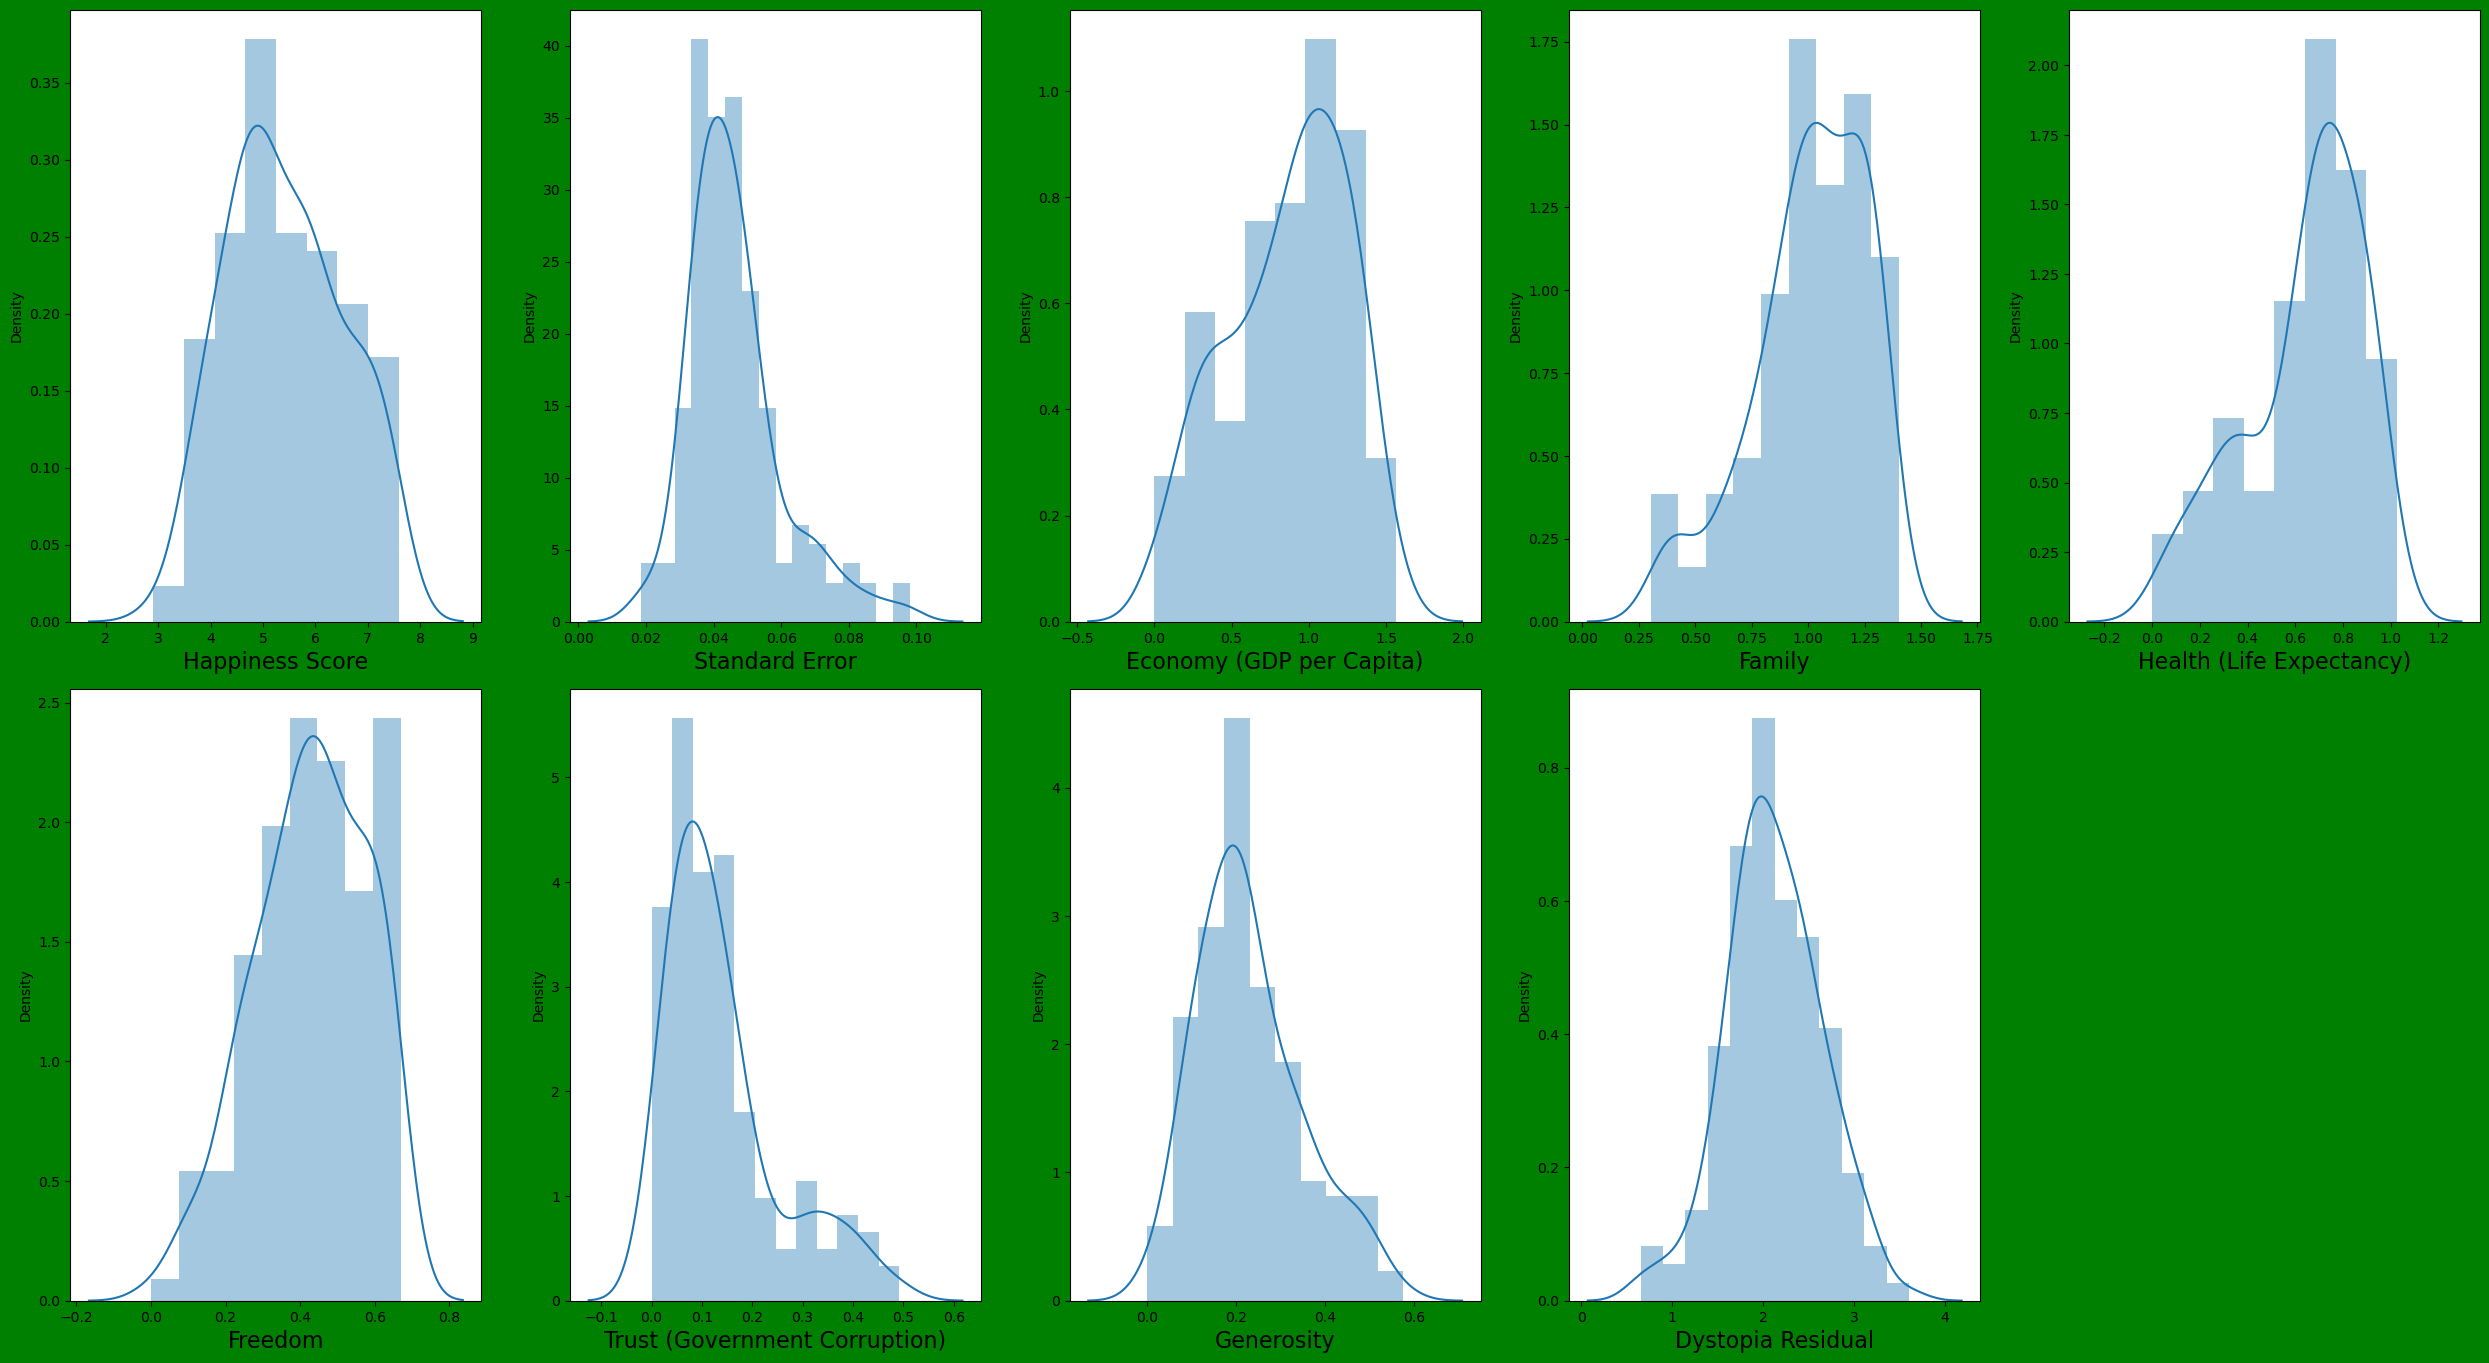

In [184]:
plt.figure(figsize=(25,20),facecolor="g")
plot=1
for i in new_df.columns:
    if plot<=15:
        if i=="Region":
            continue
        plt.subplot(3,5,plot)
        sns.distplot(new_df[i])
        plt.xlabel(i,fontsize=16)
    plot+=1
plt.tight_layout()    
plt.show()

**Here you can see all the columns are almost and equaly normally distributed**

# Checking Skewness:

In [185]:
new_df.skew().to_frame("Skewness value")

,Skewness value
Happiness Score,0.169740
Standard Error,1.243048
Economy (GDP per Capita),-0.390657
Family,-0.811340
Health (Life Expectancy),-0.747711
Freedom,-0.400867
Trust (Government Corruption),1.272530
Generosity,0.654710
Dystopia Residual,-0.021144


*Our default acceptable range for skewness is +0.5 to -0.5 and **we can see Standard Error,Family,Health (Life Expectancy),Trust (Government Corruption,Generosity these coluns are above or below compare with our acceptable range**.*

**So we have to remove their skewness.**                                                                                                                                 

In [186]:
#Removeing skewness using Cube root method
new_df["Standard Error"]=np.cbrt(new_df["Standard Error"])
new_df["Family"]=np.cbrt(new_df["Family"])
new_df["Health (Life Expectancy)"]=np.cbrt(new_df["Health (Life Expectancy)"])
new_df["Trust (Government Corruption)"]=np.cbrt(new_df["Trust (Government Corruption)"])
new_df["Generosity"]=np.cbrt(new_df["Generosity"])

In [187]:
#Checking skewness again
new_df.skew()

Happiness Score                  0.169740
Standard Error                   0.528395
Economy (GDP per Capita)        -0.390657
Family                          -1.318995
Health (Life Expectancy)        -2.067331
Freedom                         -0.400867
Trust (Government Corruption)   -0.064568
Generosity                      -1.087392
Dystopia Residual               -0.021144
dtype: float64

**Here you can see some column's skewness is under acceptable range but some of the coumns's skewness are going beyond our acceptable range or our cube root did not affect them.So we are using another skewness removing method that is ***log function +1*** lets see:**

In [188]:
#Appling log function +1 method  to Family,Health (Life Expectancy),Trust (Government Corruption),Generosity to remove skewness because in skewness values there are negative values are present so boxcox will not work
#Appling log1p
new_df["Family"]=np.log1p(new_df["Family"])
new_df["Health (Life Expectancy)"]=np.log1p(new_df["Health (Life Expectancy)"])
new_df["Generosity"]=np.log1p(new_df["Generosity"])

In [189]:
#Checking skewness again
new_df.skew()

Happiness Score                  0.169740
Standard Error                   0.528395
Economy (GDP per Capita)        -0.390657
Family                          -1.454964
Health (Life Expectancy)        -2.775314
Freedom                         -0.400867
Trust (Government Corruption)   -0.064568
Generosity                      -1.773253
Dystopia Residual               -0.021144
dtype: float64

**Still you can see Family,Health (Life Expectancy),Generosity has higher skewness value.** So I am gonna use PowerTransformer.

In [190]:
#Using PowerTransformer to reduce skewness 
from sklearn.preprocessing import PowerTransformer
reshape_Family_column=new_df["Family"].values.reshape(-1,1)
reshape_Health_column=new_df["Health (Life Expectancy)"].values.reshape(-1,1)
reshape_Generosity_column=new_df["Generosity"].values.reshape(-1,1)

pt=PowerTransformer("yeo-johnson")  #yeo-johnson method works on both positive and Negative method

#Now fitting the Transfomer
Family_column_transformed=pt.fit_transform(reshape_Family_column)
Health_column_transformed=pt.fit_transform(reshape_Health_column)
Generosity_column_transformed=pt.fit_transform(reshape_Generosity_column)

#Convert the transformed array back to the DataFrame
new_df["Family"]=pd.DataFrame(Family_column_transformed)
new_df["Health (Life Expectancy)"]=pd.DataFrame(Health_column_transformed)
new_df["Generosity"]=pd.DataFrame(Generosity_column_transformed)


In [191]:
#Checking skewness again
new_df.skew()

Happiness Score                  0.169740
Standard Error                   0.528395
Economy (GDP per Capita)        -0.390657
Family                          -0.223527
Health (Life Expectancy)        -0.422596
Freedom                         -0.400867
Trust (Government Corruption)   -0.064568
Generosity                       0.049884
Dystopia Residual               -0.021144
dtype: float64

**Now you can see all column's skewness is under our acceptable range.**

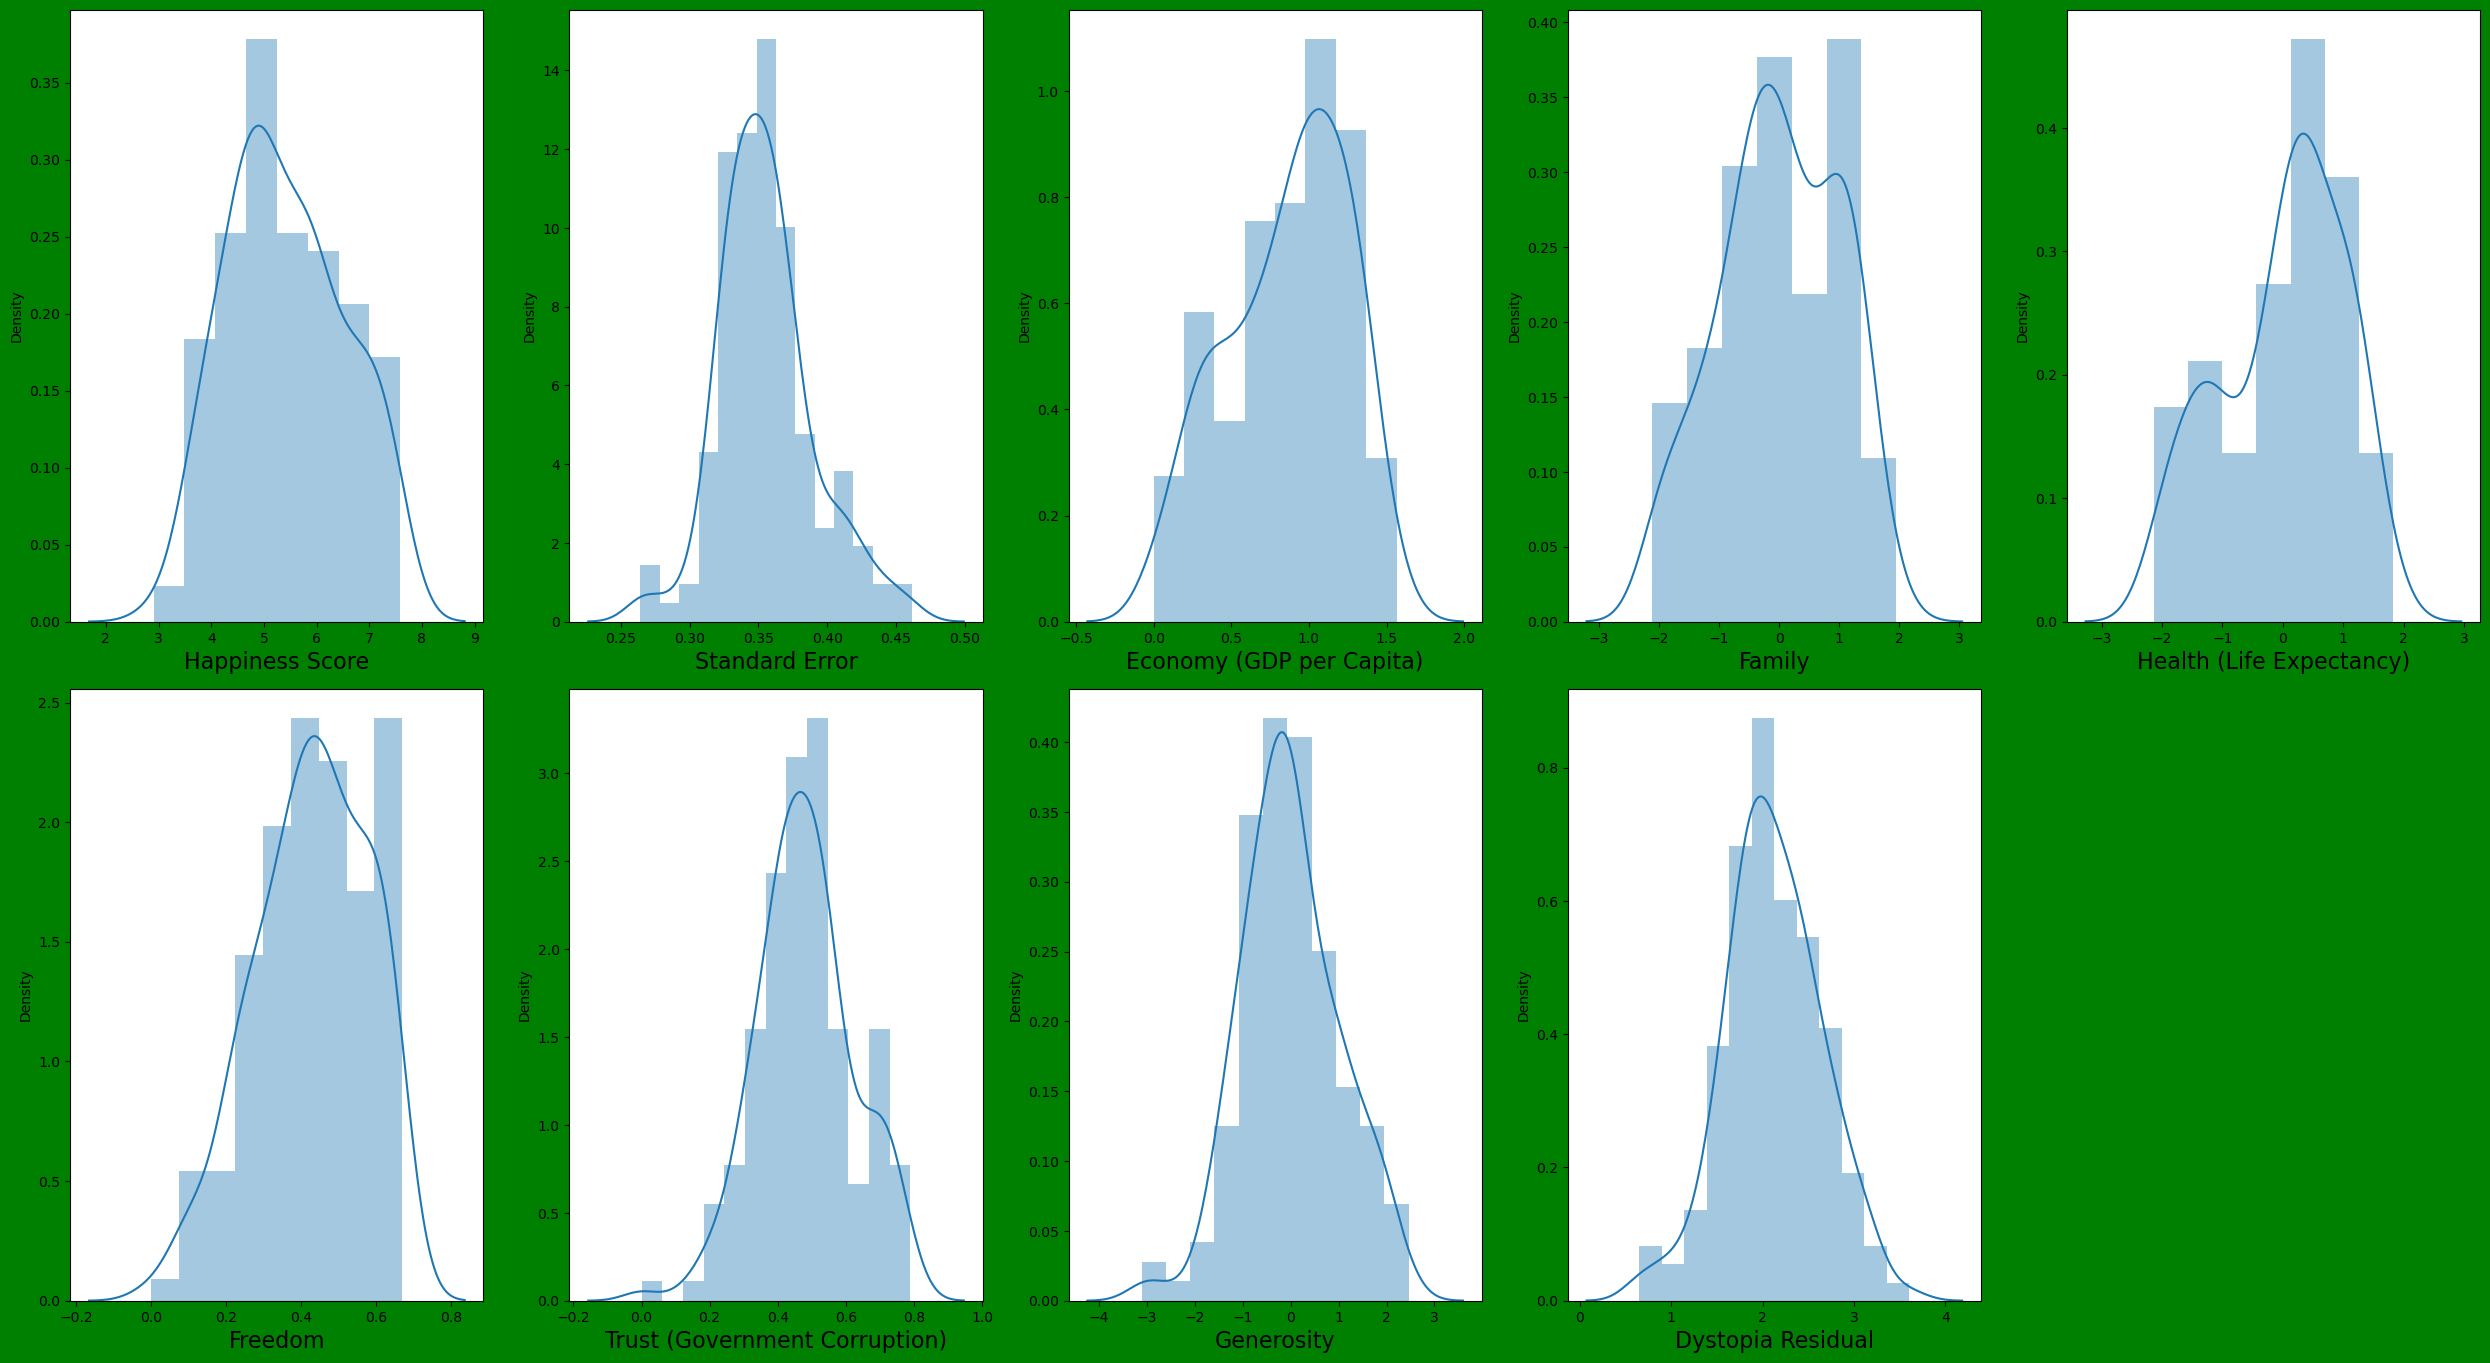

In [192]:
#Checking Data distribution for all columns again
plt.figure(figsize=(25,20),facecolor="g")
plot=1
for i in new_df.columns:
    if plot<=15:
        if i=="Region":
            continue
        plt.subplot(3,5,plot)
        sns.distplot(new_df[i])
        plt.xlabel(i,fontsize=16)
    plot+=1
plt.tight_layout()    
plt.show()

**Now we can see all columns are normally distributed.**

In [193]:
new_df.isnull().sum()

Region                           0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           7
Health (Life Expectancy)         7
Freedom                          0
Trust (Government Corruption)    0
Generosity                       7
Dystopia Residual                0
dtype: int64

**So I have to fill these column's null value**

In [194]:
#Filling the null values of these columns
print(new_df["Family"].mean())
print(new_df["Family"].median())

print(new_df["Health (Life Expectancy)"].mean())
print(new_df["Health (Life Expectancy)"].median())

print(new_df["Generosity"].mean())
print(new_df["Generosity"].median())

#I choose median to fill all these column's NaN values
new_df["Family"]=new_df["Family"].fillna(new_df["Family"].median())
new_df["Health (Life Expectancy)"]=new_df["Health (Life Expectancy)"].fillna(new_df["Health (Life Expectancy)"].median())
new_df["Generosity"]=new_df["Generosity"].fillna(new_df["Generosity"].median())

-0.0001432247328947141
-0.0290220275565118
0.005457467079025346
0.21540706213317232
-0.0024042282985903057
-0.05760884602362013


In [195]:
new_df.isnull().sum()

Region                           0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

**Now we can see there is no NaN value is present.**

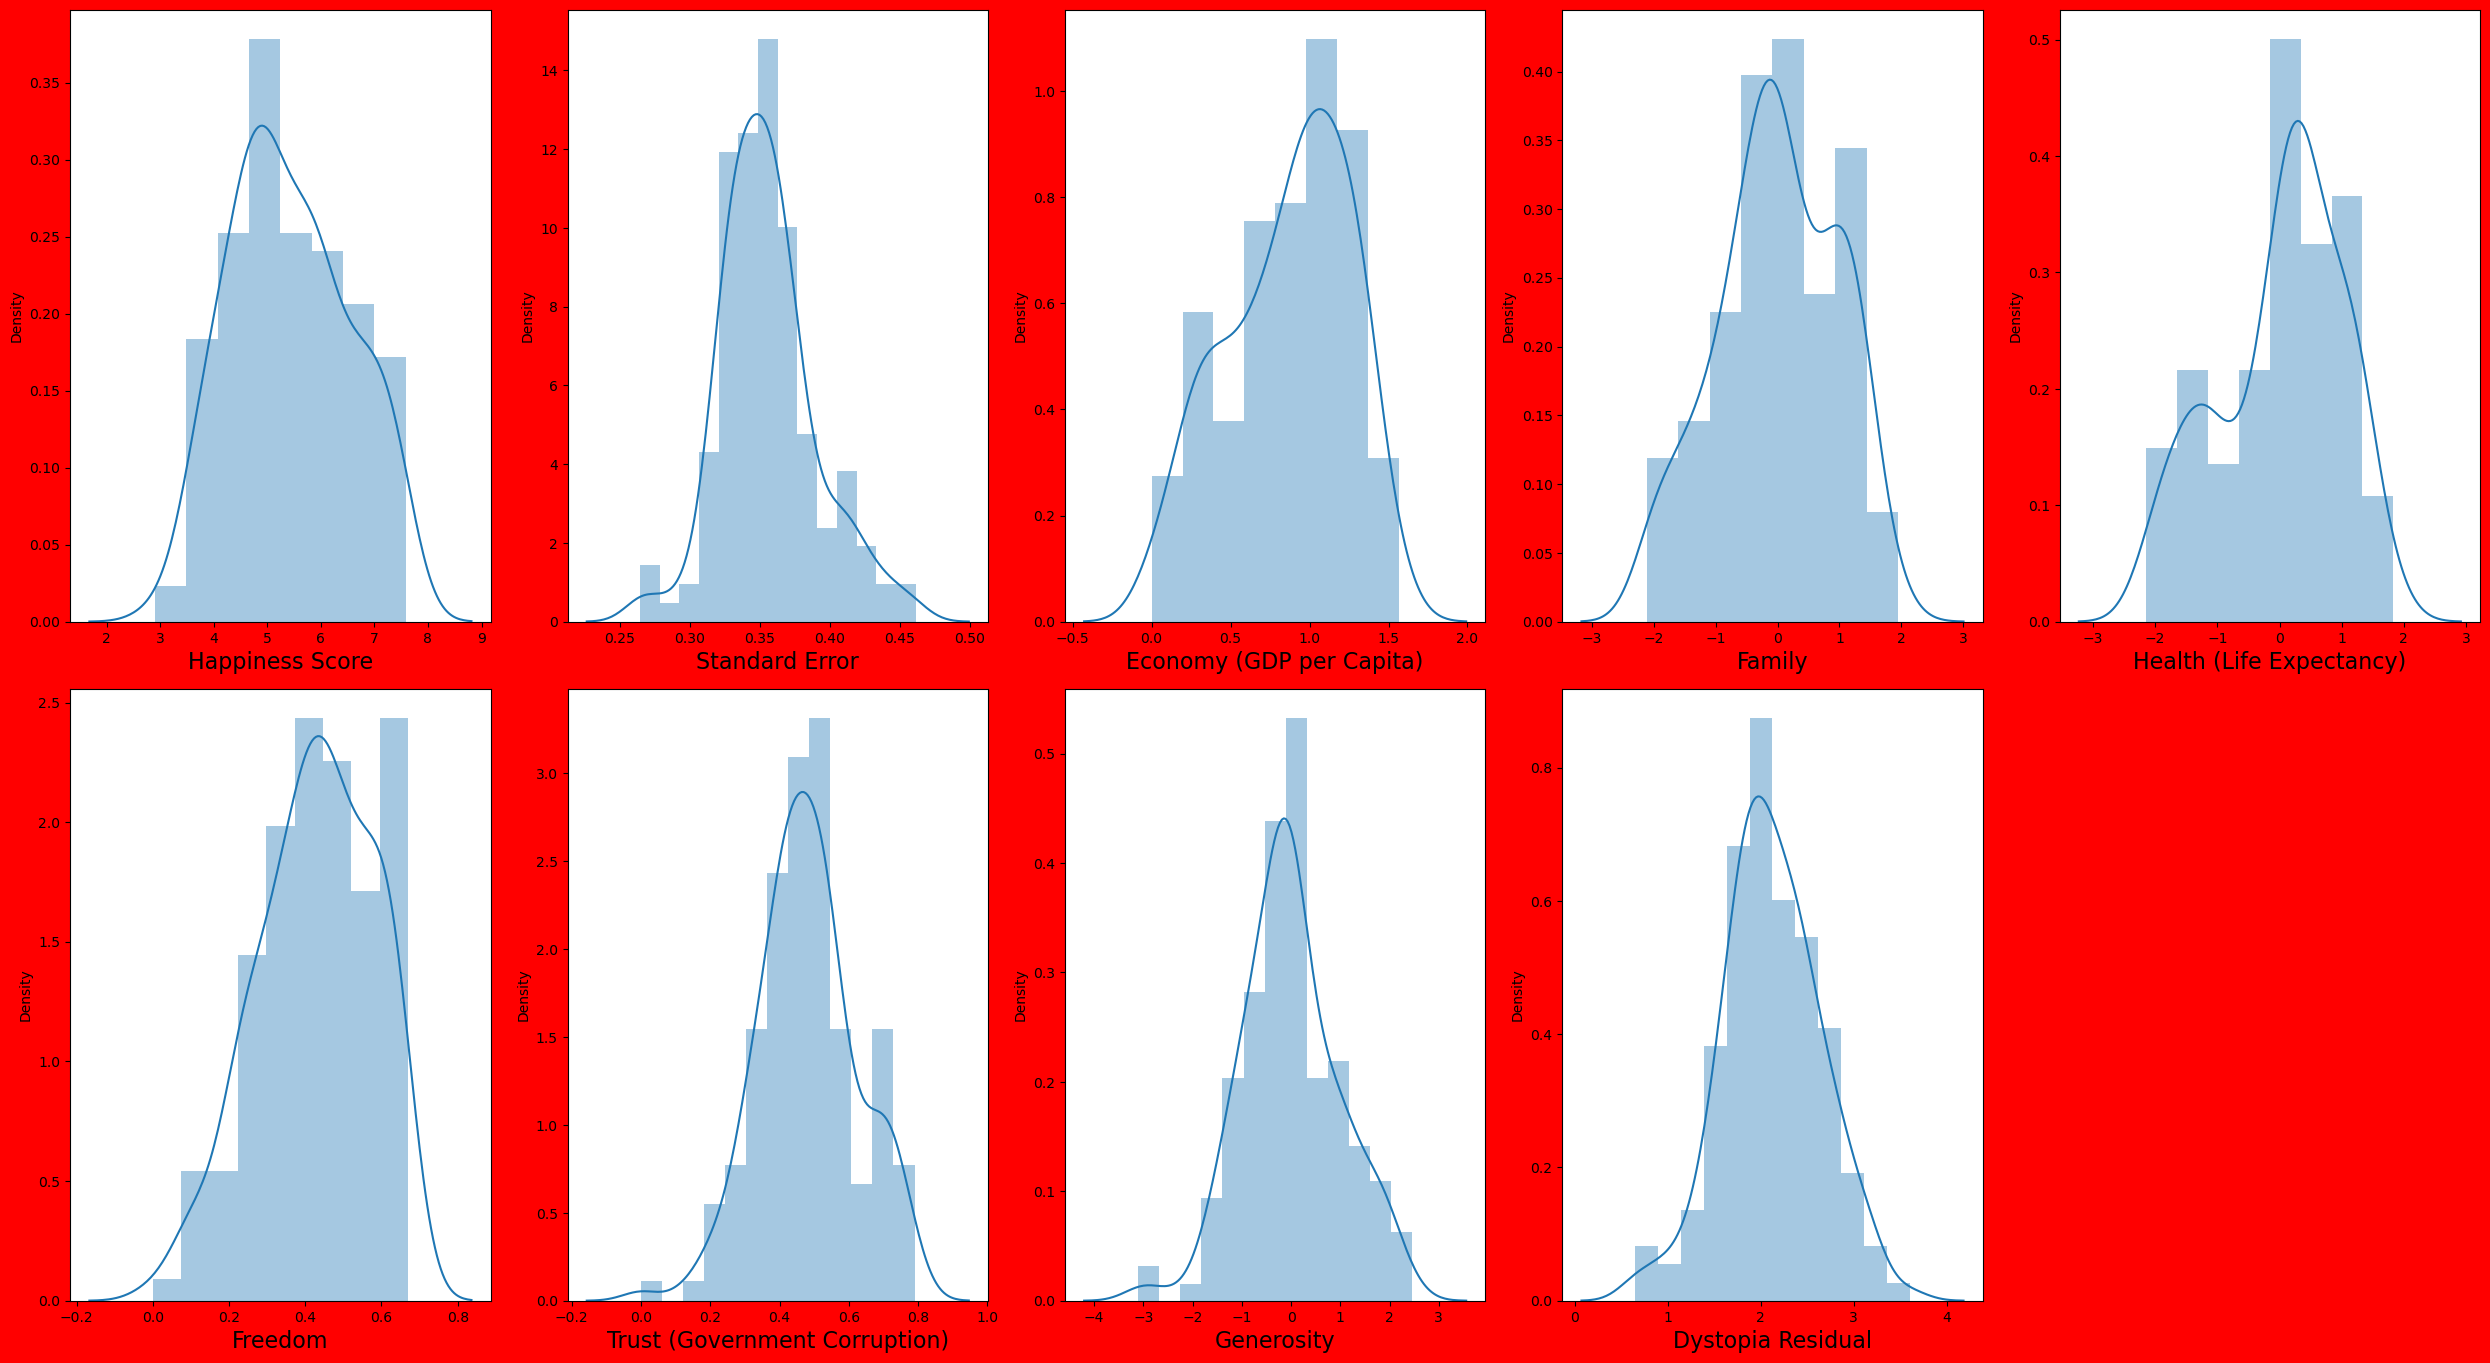

In [196]:
#Checking Data distribution for all columns again
plt.figure(figsize=(25,20),facecolor="r")
plot=1
for i in new_df.columns:
    if plot<=15:
        if i=="Region":
            continue
        plt.subplot(3,5,plot)
        sns.distplot(new_df[i])
        plt.xlabel(i,fontsize=16)
    plot+=1
plt.tight_layout()    
plt.show()

**All the columns are nomally distributed.**

# Encoding Categorical columns

In [197]:
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()

for i in new_df.columns:
    if new_df[i].dtypes=="object":
        new_df[i]=oe.fit_transform(new_df[i].values.reshape(-1,1))
        
new_df

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,
1,9.0,7.587,0.324310,1.39651,1.946424,1.407137,0.66557,0.748756,1.581294,2.51738
2,9.0,7.561,0.365532,1.30232,1.688815,1.024660,0.62877,0.521036,0.931471,2.70201
3,9.0,7.527,0.321658,1.32548,1.510840,1.078955,0.64938,0.784910,0.971346,2.49204
4,9.0,7.522,0.338540,1.45900,1.461535,1.184746,0.66973,0.714677,1.723771,2.46531
5,5.0,7.427,0.328749,1.32629,1.435956,1.099069,0.63297,0.690742,0.113326,2.45176
...,...,...,...,...,...,...,...,...,...,...
151,8.0,3.655,0.371834,0.46534,-0.029022,0.215407,0.46866,0.563805,-0.057609,1.41723
152,8.0,3.587,0.350990,0.25812,-0.029022,0.215407,0.39493,0.504388,-0.057609,1.46494
153,7.0,3.575,0.313597,0.31982,-0.029022,0.215407,0.23414,0.459770,-0.057609,1.95210


**Now you can see "Region" column is encoded.**

In [198]:
#Checking all columns datatypes
new_df.dtypes

Region                           float64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [199]:
new_df.dtypes

Region                           float64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

# Correlation between our Target column and all the Features

In [200]:
new_df.corr()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,-0.145850,-0.047835,-0.224928,-0.064759,-0.164379,0.101335,0.211246,0.096251,-0.059494
Happiness Score,-0.145850,1.000000,-0.237228,0.773577,0.680946,0.662233,0.585066,0.394775,0.228423,0.528334
Standard Error,-0.047835,-0.237228,1.000000,-0.244856,-0.142211,-0.137834,-0.202292,-0.095125,-0.099481,0.028798
Economy (GDP per Capita),-0.224928,0.773577,-0.244856,1.000000,0.497758,0.525677,0.376780,0.231317,0.116227,0.026936
Family,-0.064759,0.680946,-0.142211,0.497758,1.000000,0.542592,0.391021,0.262731,0.186645,0.436093
Health (Life Expectancy),-0.164379,0.662233,-0.137834,0.525677,0.542592,1.000000,0.425497,0.354355,0.106460,0.350577
Freedom,0.101335,0.585066,-0.202292,0.376780,0.391021,0.425497,1.000000,0.482062,0.107322,0.058596
Trust (Government Corruption),0.211246,0.394775,-0.095125,0.231317,0.262731,0.354355,0.482062,1.000000,0.215049,0.107929
Generosity,0.096251,0.228423,-0.099481,0.116227,0.186645,0.106460,0.107322,0.215049,1.000000,0.179365
Dystopia Residual,-0.059494,0.528334,0.028798,0.026936,0.436093,0.350577,0.058596,0.107929,0.179365,1.000000


In [201]:
new_df.corr()["Happiness Score"].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.773577
Family                           0.680946
Health (Life Expectancy)         0.662233
Freedom                          0.585066
Dystopia Residual                0.528334
Trust (Government Corruption)    0.394775
Generosity                       0.228423
Region                          -0.145850
Standard Error                  -0.237228
Name: Happiness Score, dtype: float64

**Observation:-**
    
*1) "Economy (GDP per Capita)" column has strong positive relation with our Target column.*

*2) "Standard Error" has the maximun negative correlation with our Target column.*



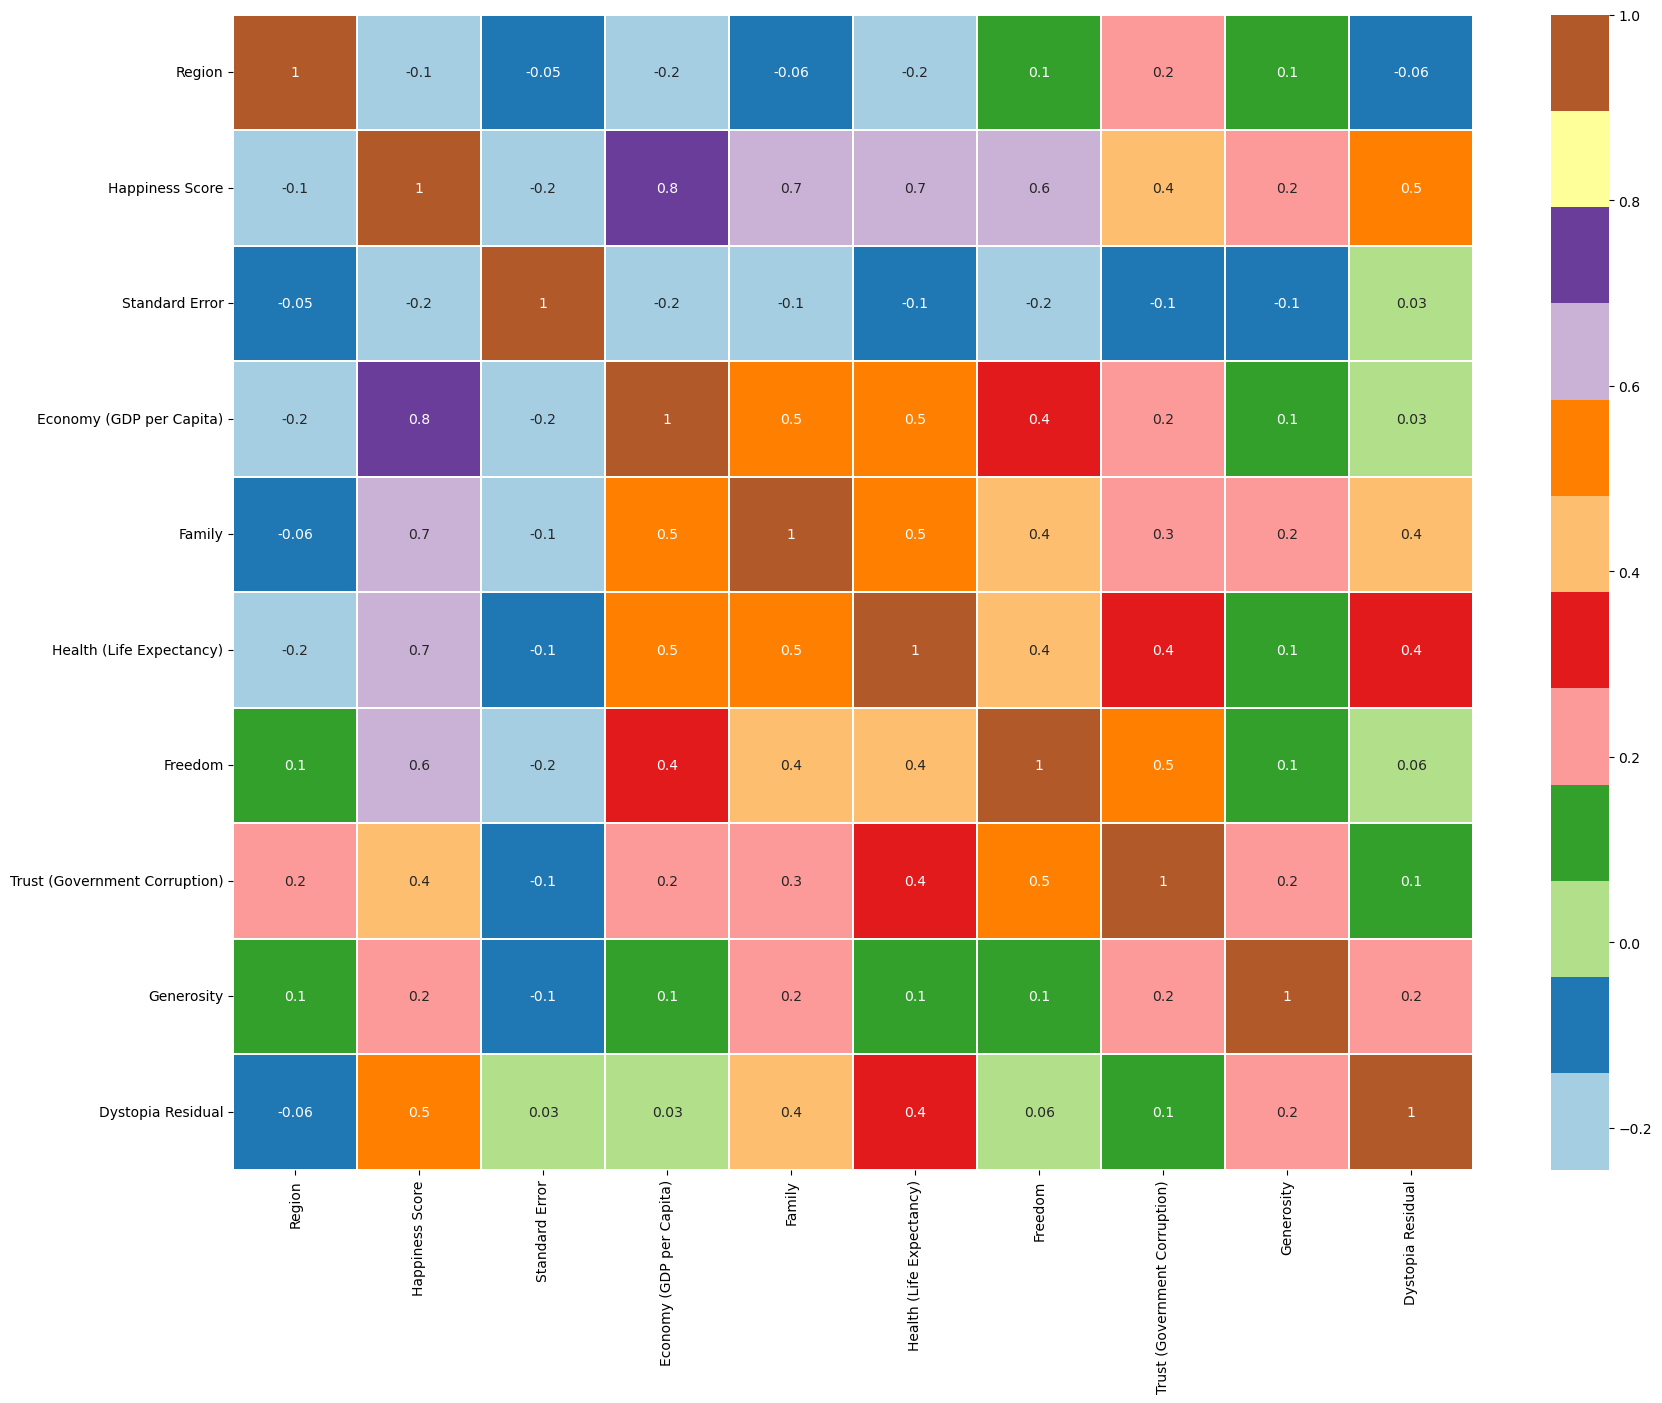

In [202]:
#Visualization correlation with heatmap
plt.figure(figsize=(20,15))
sns.heatmap(new_df.corr(),cmap="Paired",linewidths=0.1,fmt=".1g",annot=True)
plt.yticks(rotation=0)
plt.show()

# Separating Features and Label

In [203]:
x=new_df.drop("Happiness Score",axis=1)
y=new_df["Happiness Score"]

In [204]:
x.head(2)

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,
1,9.0,0.324310,1.39651,1.946424,1.407137,0.66557,0.748756,1.581294,2.51738
2,9.0,0.365532,1.30232,1.688815,1.024660,0.62877,0.521036,0.931471,2.70201


In [205]:
y.tail(2)

Happiness Rank
155    3.340
157    2.905
Name: Happiness Score, dtype: float64

# Feature Scalling with StandardScaler

In [206]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.296837,-0.911097,1.381916,2.032616,1.414766,1.583704,1.886835,1.600833,0.756876
1,1.296837,0.289534,1.138324,1.763807,1.025982,1.338953,0.279412,0.945053,1.109300
2,1.296837,-0.988343,1.198220,1.578094,1.081173,1.476027,2.142033,0.985294,0.708507
3,1.296837,-0.496623,1.543526,1.526645,1.188708,1.611371,1.646273,1.744615,0.657485
4,-0.026647,-0.781797,1.200315,1.499954,1.101618,1.366887,1.477326,0.119408,0.631620
...,...,...,...,...,...,...,...,...,...
144,0.965966,0.473095,-1.026255,-0.028719,0.203385,0.274090,0.581308,-0.053093,-1.343100
145,0.965966,-0.134003,-1.562163,-0.028719,0.203385,-0.216276,0.161899,-0.053093,-1.252030
146,0.635095,-1.223140,-1.402596,-0.028719,0.203385,-1.285662,-0.153050,-0.053093,-0.322135
147,0.965966,-0.690149,-1.488379,-0.028719,0.203385,0.379439,-0.355660,-0.053093,-0.930702


# Variance Inflation Factor(V.I.F)

In [207]:
#Checking Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features Name"]=x.columns
vif

,VIF Values,Features Name
0,1.207218,Region
1,1.096112,Standard Error
2,1.852810,Economy (GDP per Capita)
3,1.943128,Family
4,1.943418,Health (Life Expectancy)
5,1.599997,Freedom
6,1.473677,Trust (Government Corruption)
7,1.104706,Generosity
8,1.474120,Dystopia Residual


**Here you can see all column's VIF values are in below 10.So there is no Multicolinearity issue.**

# Modeling

# Finding the best random_state

In [208]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

MaxAcc=0
MaxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestRegressor()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    Acc=r2_score(y_test,pred)
    
    if Acc>MaxAcc:
        MaxAcc=Acc
        MaxRs=i
        
print("Max Accuracy is",MaxAcc,"in the random state: ",MaxRs)

Max Accuracy is 0.9386388421162807 in the random state:  114


# Creating train_test_split

In [209]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=MaxRs)

In [210]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge

**LinearRegression**

In [211]:
#Testing LinearRegression r2_score with all error metrics
LR=LinearRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predLR))
print("Mean Squared Error:-",mean_squared_error(y_test,predLR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predLR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predLR)))

R2 Score:- 0.9308246458757389
Mean Squared Error:- 0.08330257231692857
Mean Absolute Error:- 0.22723250618998642
Root Mean Absolute Error:- 0.4766891085288046


**RandomForestRegressor**

In [212]:
#Testing RandomForestRegressor r2_score with all error metrics
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR=RFR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predRFR))
print("Mean Squared Error:-",mean_squared_error(y_test,predRFR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predRFR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predRFR)))

R2 Score:- 0.9319607834477663
Mean Squared Error:- 0.08193440899555567
Mean Absolute Error:- 0.24150133333333335
Root Mean Absolute Error:- 0.4914278516052314


**ExtraTreesRegressor**

In [213]:
#Testing ExtraTreesRegressor r2_score with all error metrics
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
predETR=ETR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predETR))
print("Mean Squared Error:-",mean_squared_error(y_test,predETR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predETR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predETR)))

R2 Score:- 0.9406537028740921
Mean Squared Error:- 0.07146619299111069
Mean Absolute Error:- 0.2225862222222219
Root Mean Absolute Error:- 0.4717904431230267


**DecisionTreeRegressor**

In [214]:
#Testing DecisionTreeRegressor r2_score with all error metrics
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR=DTR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predDTR))
print("Mean Squared Error:-",mean_squared_error(y_test,predDTR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predDTR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predDTR)))

R2 Score:- 0.7262351008743404
Mean Squared Error:- 0.32967406666666654
Mean Absolute Error:- 0.4466444444444443
Root Mean Absolute Error:- 0.6683146298297264


**KNeighborsRegressor**

In [215]:
#Testing KNeighborsRegressor r2_score with all error metrics
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print("R2 Score:-",r2_score(y_test,predKNN))
print("Mean Squared Error:-",mean_squared_error(y_test,predKNN))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predKNN))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predKNN)))

R2 Score:- 0.9114041897900665
Mean Squared Error:- 0.10668913777777779
Mean Absolute Error:- 0.2623377777777778
Root Mean Absolute Error:- 0.5121892011530288


**SVR**

In [216]:
#Testing SVR r2_score with all error metrics
svr=SVR()
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
print("R2 Score:-",r2_score(y_test,predsvr))
print("Mean Squared Error:-",mean_squared_error(y_test,predsvr))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predsvr))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predsvr)))

R2 Score:- 0.9488648349236852
Mean Squared Error:- 0.061578156565068216
Mean Absolute Error:- 0.19036549724051316
Root Mean Absolute Error:- 0.43630894700947076


**Lasso**

In [217]:
#Testing Lasso r2_score with all error metrics
Lasso=Lasso()
Lasso.fit(x_train,y_train)
predLasso=Lasso.predict(x_test)
print("R2 Score:-",r2_score(y_test,predLasso))
print("Mean Squared Error:-",mean_squared_error(y_test,predLasso))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predLasso))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predLasso)))

R2 Score:- -0.019276647064966568
Mean Squared Error:- 1.227436674202827
Mean Absolute Error:- 0.8952175213675214
Root Mean Absolute Error:- 0.9461593530518638


**Ridge**

In [218]:
#Testing Ridge r2_score with all error metrics
ridge=Ridge()
ridge.fit(x_train,y_train)
predRidge=ridge.predict(x_test)
print("R2 Score:-",r2_score(y_test,predRidge))
print("Mean Squared Error:-",mean_squared_error(y_test,predRidge))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predRidge))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predRidge)))

R2 Score:- 0.9303771325790666
Mean Squared Error:- 0.0838414782499848
Mean Absolute Error:- 0.2280959466327633
Root Mean Absolute Error:- 0.4775939139402462


**Observation:-**

*Till now SVR is our best model with 0.9488 r2_score and minimum error metrics score.But we have to cross check it with cross validation (cross_val_score)*

# Cross Validation

**In crossvalidation of Regressors we have to use a parameter called scoring and have to put "r2" as it's value.**

In [219]:
from sklearn.model_selection import cross_val_score
result=cross_val_score(LR,x,y,scoring="r2")
print(result)
print(result.mean())
print("The differents between R2 Score of LinearRegression with it's cross validation is :-",(r2_score(y_test,predLR)-result.mean())*100)

[-0.40667733 -0.1370067  -0.28153736 -3.08183568 -0.88888393]
-0.9591881987786948
The differents between R2 Score of LinearRegression with it's cross validation is :- 189.00128446544335


In [220]:
result2=cross_val_score(RFR,x,y,scoring="r2")
print(result2)
print(result2.mean())
print("The differents between R2 Score of RandomForestRegressor with it's cross validation is :-",(r2_score(y_test,predRFR)-result2.mean())*100)

[-9.29741285 -2.93029491 -1.85402224 -2.84969568 -7.88112584]
-4.962510302182414
The differents between R2 Score of RandomForestRegressor with it's cross validation is :- 589.4471085630181


In [221]:
result3=cross_val_score(ETR,x,y,scoring="r2")
print(result3)
print(result3.mean())
print("The differents between R2 Score of ExtraTreesRegressor with it's cross validation is :-",(r2_score(y_test,predETR)-result3.mean())*100)

[-8.18360366 -0.97231444 -2.47843358 -3.08985059 -7.03850334]
-4.352541121291869
The differents between R2 Score of ExtraTreesRegressor with it's cross validation is :- 529.3194824165962


In [222]:
result4=cross_val_score(DTR,x,y,scoring="r2")
print(result4)
print(result4.mean())
print("The differents between R2 Score of DecisionTreeRegressor with it's cross validation is :-",(r2_score(y_test,predDTR)-result4.mean())*100)

[ -7.59441165  -8.78099591 -10.5502368  -14.47742123  -5.89824687]
-9.460262491557659
The differents between R2 Score of DecisionTreeRegressor with it's cross validation is :- 1018.6497592431999


In [223]:
result5=cross_val_score(KNN,x,y,scoring="r2")
print(result5)
print(result5.mean())
print("The differents between R2 Score of KNeighborsRegressor with it's cross validation is :-",(r2_score(y_test,predKNN)-result5.mean())*100)

[-10.59413862  -3.79929786  -6.27572277  -7.44391604  -6.90076955]
-7.00276896764092
The differents between R2 Score of KNeighborsRegressor with it's cross validation is :- 791.4173157430986


In [224]:
result6=cross_val_score(svr,x,y,scoring="r2")
print(result6)
print(result6.mean())
print("The differents between R2 Score of SVR with it's cross validation is :-",(r2_score(y_test,predsvr)-result6.mean())*100)

[-8.80547    -0.10396658 -0.29096872 -1.90586526 -5.62830641]
-3.346915394425757
The differents between R2 Score of SVR with it's cross validation is :- 429.5780229349442


In [225]:
result7=cross_val_score(Lasso,x,y,scoring="r2")
print(result7)
print(result7.mean())
print("The differents between R2 Score of Lasso with it's cross validation is :-",(r2_score(y_test,predLasso)-result7.mean())*100)

[-42.37117014 -11.06215836  -0.30321946 -32.72956581 -29.0315447 ]
-23.099531692553747
The differents between R2 Score of Lasso with it's cross validation is :- 2308.025504548878


In [227]:
result8=cross_val_score(ridge,x,y,scoring="r2")
print(result8)
print(result8.mean())
print("The differents between R2 Score of Lasso with it's cross validation is :-",(r2_score(y_test,predRidge)-result8.mean())*100)

[-0.54844126 -0.08942706 -0.27762274 -2.97318187 -1.0235758 ]
-0.9824497460530083
The differents between R2 Score of Lasso with it's cross validation is :- 191.2826878632075


**Observation:-**

*Based on the low difference between a r2 score and it's croll_val_score **LinearRegression** is our best model.*

# Hyper Parameter Tuning

In [228]:
from sklearn.model_selection import GridSearchCV
parameter={
    "fit_intercept" : [True,False],
    "copy_X":[True,False],
    "n_jobs":[1,4,10,20]
          }

In [229]:
GCV=GridSearchCV(LinearRegression(),parameter,cv=10)

In [230]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 4, 10, 20]})

In [231]:
GCV.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1}

# Final Model

In [232]:
model=LinearRegression(copy_X= True,fit_intercept=True,n_jobs= 1)

In [233]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print("R2 Score:-",r2_score(y_test,pred))
print("Mean Squared Error:-",mean_squared_error(y_test,pred))
print("Mean Absolute Error",mean_absolute_error(y_test,pred))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,pred)))

R2 Score:- 0.9308246458757389
Mean Squared Error:- 0.08330257231692857
Mean Absolute Error 0.22723250618998642
Root Mean Squared Error 0.28862185003379176


**Observation:-**

*Earlier my LinearRegression r2_score was 0.93082 and now it is 0.93082 so you might be thinking there is no change but if you look at the Root Mean Squared Error, earlier it was 0.4766 and now it's 0.2886 so we can see it reduce,that's mean my model is improved.* 

# Serialization And Deserialization

In [241]:
#Saving the model
import joblib
joblib.dump(model,"Happiness_score.pkl")

['Happiness_score.pkl']

In [242]:
#Loading the model again to predict Happiness scores
model=joblib.load('Happiness_score.pkl')

#prediction
prediction=model.predict(x_test)
prediction

array([4.48006044, 4.76187234, 5.34218001, 4.81788958, 5.96400267,
       4.64677184, 5.54369784, 4.77156747, 6.92550147, 5.94170446,
       4.2219033 , 5.51419323, 3.96727908, 4.30950288, 4.12272451,
       7.22143648, 5.30460276, 4.86696237, 4.79322232, 6.68484104,
       3.32558884, 4.43291824, 5.50824908, 5.55053635, 5.2241502 ,
       5.8895053 , 5.06691776, 4.63502343, 5.50590788, 3.98710269,
       6.85268052, 5.75306085, 5.46727115, 6.68506981, 4.46403786,
       7.1792865 , 7.11581672, 5.49051634, 6.15363872, 7.3345788 ,
       7.24862328, 6.98111049, 6.76525753, 6.42862305, 4.48590553])

In [243]:
#Checking orginal Happiness score and compare it with our model prediction score
a=np.array(y_test)
Test=pd.DataFrame()
Test["Prediction"]=prediction
Test["Original"]=a
Test

,Prediction,Original
0,4.480060,4.077
1,4.761872,5.286
2,5.342180,5.332
3,4.817890,5.123
4,5.964003,5.987
5,4.646772,4.369
6,5.543698,5.013
7,4.771567,4.898
8,6.925501,7.286
9,5.941704,5.975


# Making a use define function to predict the Happiness Score for a country

In [245]:
def predict_medical(b):
    b=b.reshape(1,-1)
    result=model.predict(b)
    if result<3:
        print("The happiness score is :-",result,"and it's too low")
        
    elif result>=3 and result<6:
        print("The happiness score is :-",result,"and it's average")
        
    else:
        print("The happiness score is :-",result,"and it's outstanding")
        

In [248]:
user=np.array([9.0,0.324310,1.39651,1.946424,1.407137,0.66557,0.748756,1.581294,2.51738])

In [249]:
predict_medical(user)

The happiness score is :- [7.96648374] and it's outstanding
